# Eijah Kojo Danso Appau


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('Company_ad_buys_and_sales.csv')

In [3]:
df


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [36]:
# create list X - the TV
X = df.iloc[:, 0:1].values

# create list y - the Sales
y = df.iloc[:, 3].values

array([22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6, 12.6,
       17.4,  9.2, 13.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 17.5,
        5.6, 20.5,  9.7, 17. , 15. , 20.9, 18.9, 10.5, 21.4, 11.9, 13.2,
       17.4, 11.9, 17.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 17.9,
        8.5, 16.1, 10.6, 23.2, 19.8,  9.7, 16.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 20.7, 14. , 16. , 11.3,
       11. , 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 17.3, 11.3, 13.6, 21.7, 20.2, 12. , 16. ,
       12.9, 16.7, 14. ,  7.3, 19.4, 22.2, 11.5, 16.9, 16.7, 20.5, 25.4,
       17.2, 16.7, 23.8, 19.8, 19.7, 20.7, 15. ,  7.2, 12. ,  5.3, 19.8,
       18.4, 21.8, 17.1, 20.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 16.6, 15.2, 19.7, 10.6,  6.6, 11.9, 24.7,  9.7,  1.6, 17.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 12.3, 10.3, 18.2, 25.4, 10.9, 10.1, 16

In [37]:
# Linear regression with scikit-learn

# import the library
from sklearn.linear_model import LinearRegression

# create an instance of the linear regression class
lin_reg = LinearRegression()
# fit (train) the model
lin_reg.fit(X, y)

LinearRegression()

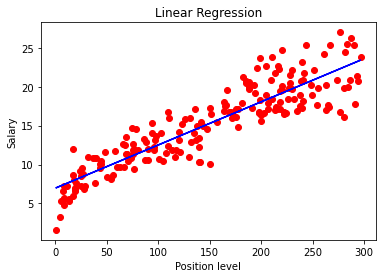

In [38]:
# visualization function - we could easily parameterize this to make it modular
def viz_linear():
    plt.scatter(X, y, color='red')
    # the predict function just returns the slope times x + intercept 
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Linear Regression')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return

# run it    
viz_linear()

In [39]:
#calculate predictions based on the regression line
predicted = map(lambda x:lin_reg.predict([x]),X)
b = list(predicted)

# calculate R-squared
from sklearn.metrics import r2_score 
R_2 = r2_score(y, b) 
print('R-squared, or the Coefficient of Determination =', R_2) 

R-squared, or the Coefficient of Determination = 0.8121757029987414


In [40]:
# we could also have just used the builtin function :) There are always many options
r_squared = lin_reg.score(X, y)
print(r_squared)

0.8121757029987414


In [56]:
# predicting a new result
TV_to_estimate = 25
sales_estimate = lin_reg.predict([[TV_to_estimate]])
print('With a linear regression model, TV', TV_to_estimate, 'should get a sales of $' ,sales_estimate[0])

With a linear regression model, TV 25 should get a sales of $ 8.361440749968864


Polynomial Regression

In [44]:
# using numpy
a = np.array(df['TV'])
b = np.array(df['Sales'])

poly_model_np = np.poly1d(np.polyfit(a, b, 3))

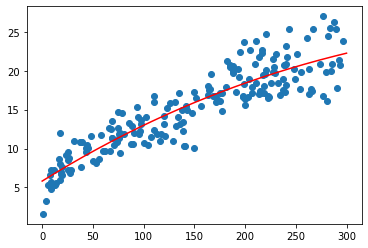

In [51]:
# visualization
import matplotlib.pyplot as plt

xp = np.linspace(0, 300, 200)
# plot data
plt.scatter(a, b)
# plot prediction line
plt.plot(xp, poly_model_np(xp), c='r')
plt.show()

In [52]:
# using scikit-learn
from sklearn.preprocessing import PolynomialFeatures
# create features object
poly_reg = PolynomialFeatures(degree=4)
# create feature matrix
X_poly = poly_reg.fit_transform(X)
# instantiate class instance
pol_reg = LinearRegression()
# fit (train) the model
pol_reg.fit(X_poly, y)

LinearRegression()

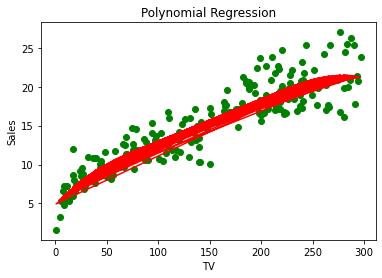

In [54]:
# polynomial visualization function
def viz_polymonial():
    plt.scatter(X, y, color='green')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='red')
    plt.title('Polynomial Regression')
    plt.xlabel('TV')
    plt.ylabel('Sales')
    plt.show()
    return

# run it
viz_polymonial()

In [55]:
# do r_squared
r_squared = pol_reg.score(X_poly, y)
print(r_squared)

0.8262342200347604


In [58]:
# predict a new result
TV_to_estimate = 25
sales_estimate = pol_reg.predict(poly_reg.fit_transform([[TV_to_estimate]]))

print('With a linear regression model, TV', TV_to_estimate, 'should get a sales of $' ,sales_estimate[0])


With a linear regression model, TV 25 should get a sales of $ 7.9444865395224165
